# Data Pre-Processing

# Step 1 : Creating a table to store the selected cities along with the unique ids 

In [67]:
import pandas as pd

# Define your data
city_data = pd.DataFrame({
    'city': ['amsterdam', 'barcelona', 'london', 'sandiego', 'toronto'],
    'id': [1, 2, 3, 4, 5]
})

# Display the DataFrame
print(city_data)

        city  id
0  amsterdam   1
1  barcelona   2
2     london   3
3   sandiego   4
4    toronto   5


# Step 2 : Part A - Reading listing data for the city of Amsterdam from the .csv and converting into a data frame

In [68]:
import pandas as pd

listing_amsterdam_df = pd.read_csv("/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/listing/listing_amsterdam.csv")
print(listing_amsterdam_df.head())

                   id                                      listing_url  \
0             6624170             https://www.airbnb.com/rooms/6624170   
1             8837071             https://www.airbnb.com/rooms/8837071   
2              716107              https://www.airbnb.com/rooms/716107   
3  664538756986273255  https://www.airbnb.com/rooms/664538756986273255   
4             8191077             https://www.airbnb.com/rooms/8191077   

        scrape_id last_scraped           source  \
0  20240905174946   2024-09-05  previous scrape   
1  20240905174946   2024-09-05  previous scrape   
2  20240905174946   2024-09-05  previous scrape   
3  20240905174946   2024-09-06  previous scrape   
4  20240905174946   2024-09-05  previous scrape   

                                             name  \
0             Warm, cozy sunlighted downtown appt   
1                   Cozy apartment in city center   
2              Loft style home nearby city centre   
3  Geweldige duurzame eco woonark op

# Printing the total of no. of rows and features in the listing dataset available for Amsterdam 

In [69]:
print(listing_amsterdam_df.shape)

(9659, 75)


# Step 2 : Part B - Removing undesired columns from the listing dataframe

In [70]:
listing_amsterdam_df = listing_amsterdam_df.drop(columns=['listing_url','scrape_id','last_scraped','source','picture_url','host_url','host_response_time',
                                                          'host_response_rate','host_acceptance_rate','host_thumbnail_url','host_picture_url','neighbourhood_group_cleansed',
                                                          'calendar_updated','license','calendar_last_scraped'])

print(listing_amsterdam_df.shape)

(9659, 60)


# Step 2 : Part C - Adding the city_id field to all the records in the listing dataframe

In [71]:
amsterdam_id = city_data.loc[city_data['city'] == 'amsterdam','id'].values[0]

listing_amsterdam_df['city_id'] = amsterdam_id

print(listing_amsterdam_df.shape)

(9659, 61)


# Step 3 : Part A - Reading review data for the city of Amsterdam from the .csv and converting into a data frame

In [72]:
import pandas as pd

review_amsterdam_df = pd.read_csv("/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/reviews/reviews_amstredam.csv")
print(review_amsterdam_df.head())

   listing_id    id        date  reviewer_id reviewer_name  \
0        2818  1191  2009-03-30        10952           Lam   
1        2818  1771  2009-04-24        12798         Alice   
2        2818  1989  2009-05-03        11869       Natalja   
3        2818  2797  2009-05-18        14064       Enrique   
4        2818  3151  2009-05-25        17977       Sherwin   

                                            comments  
0  Daniel is really cool. The place was nice and ...  
1  Daniel is the most amazing host! His place is ...  
2  We had such a great time in Amsterdam. Daniel ...  
3  Very professional operation. Room is very clea...  
4  Daniel is highly recommended.  He provided all...  


# Printing the total of no. of rows and features in the review dataset available for Amsterdam 

In [73]:
print(review_amsterdam_df.shape)

(440807, 6)


# Step 3 : Part B - Removing undesirable columns from the review dataframe and Adding the city_id field to all the records in the review dataframe

In [74]:
review_amsterdam_df = review_amsterdam_df.drop(columns=['reviewer_id','reviewer_name'])

review_amsterdam_df['city_id'] = amsterdam_id

print(review_amsterdam_df.shape)

(440807, 5)


# Printing the total of no. of rows and features in the listing and review dataset available for Amsterdam 

In [75]:
print(listing_amsterdam_df.shape) 

print(review_amsterdam_df.shape)

(9659, 61)
(440807, 5)


# Ananlyzing the features of the listing dataframe to check if significant fields have null values

In [76]:
print(listing_amsterdam_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9659 non-null   int64  
 1   name                                          9659 non-null   object 
 2   description                                   9310 non-null   object 
 3   neighborhood_overview                         5469 non-null   object 
 4   host_id                                       9659 non-null   int64  
 5   host_name                                     9659 non-null   object 
 6   host_since                                    9659 non-null   object 
 7   host_location                                 8547 non-null   object 
 8   host_about                                    5152 non-null   object 
 9   host_is_superhost                             9549 non-null   o

# Analyzing price column as its a significant feature for future tasks 

In [77]:
print(listing_amsterdam_df['price'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
5869 non-null   object
dtypes: object(1)
memory usage: 75.6+ KB
None


# Analyzing minimum_nights and maximum_nights column as its a significant feature for future tasks

In [78]:
print(listing_amsterdam_df['minimum_nights'].info())
print(listing_amsterdam_df['maximum_nights'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: minimum_nights
Non-Null Count  Dtype
--------------  -----
9659 non-null   int64
dtypes: int64(1)
memory usage: 75.6 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: maximum_nights
Non-Null Count  Dtype
--------------  -----
9659 non-null   int64
dtypes: int64(1)
memory usage: 75.6 KB
None


# Analyzing number_of_reviews and review_scores_rating column as its a significant feature for future tasks 

In [79]:
print(listing_amsterdam_df['number_of_reviews'].info())
print(listing_amsterdam_df['review_scores_rating'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: number_of_reviews
Non-Null Count  Dtype
--------------  -----
9659 non-null   int64
dtypes: int64(1)
memory usage: 75.6 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: review_scores_rating
Non-Null Count  Dtype  
--------------  -----  
8632 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB
None


# Dropping records with null review score rating and storing it into a new dataframe

In [80]:
listing_amsterdam_review_score_df = listing_amsterdam_df.dropna(subset=['review_scores_rating'])

# Dropping records with null price

In [81]:
listing_amsterdam_price_df = listing_amsterdam_df.dropna(subset=['price'])

# Printing the total of no. of rows and features in the listing and review dataset available for Amsterdam 

In [82]:
print(listing_amsterdam_price_df.shape)

(5869, 61)


# Ananlyzing the features of the review dataframe to check if significant fields have null values

In [83]:
print(review_amsterdam_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440807 entries, 0 to 440806
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  440807 non-null  int64 
 1   id          440807 non-null  int64 
 2   date        440807 non-null  object
 3   comments    440782 non-null  object
 4   city_id     440807 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 16.8+ MB
None


# Removing '$' and ',' from price values and converting it to float to perform numerical statistics

In [84]:
listing_amsterdam_price_df['price'] = listing_amsterdam_price_df['price'].astype(str).replace({'\$': ''}, regex=True).replace({',':''}, regex=True).astype('float')
listing_amsterdam_df['price'] = listing_amsterdam_df['price'].astype(str).replace({'\$': ''}, regex=True).replace({',':''}, regex=True).astype('float')
listing_amsterdam_review_score_df['price'] = listing_amsterdam_review_score_df['price'].astype(str).replace({'\$': ''}, regex=True).replace({',':''}, regex=True).astype('float')

print(listing_amsterdam_price_df['price'].head())
print(listing_amsterdam_df['price'].head())
print(listing_amsterdam_review_score_df['price'].head())

10    269.0
31    254.0
32    203.0
33    375.0
34    599.0
Name: price, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: price, dtype: float64
0   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: price, dtype: float64


/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11309/647685735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_amsterdam_price_df['price'] = listing_amsterdam_price_df['price'].astype(str).replace({'\$': ''}, regex=True).replace({',':''}, regex=True).astype('float')
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_11309/647685735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_amsterdam_review_score_df['price'] = listing_amsterdam_review_score_df['price'].astype

# Data pre-processing for review dataset

# Analyzing the review dataset using word cloud to identify teh frequently used words

In [85]:
from wordcloud import WordCloud

review = ''.join(review_amsterdam_df['comments'].dropna())

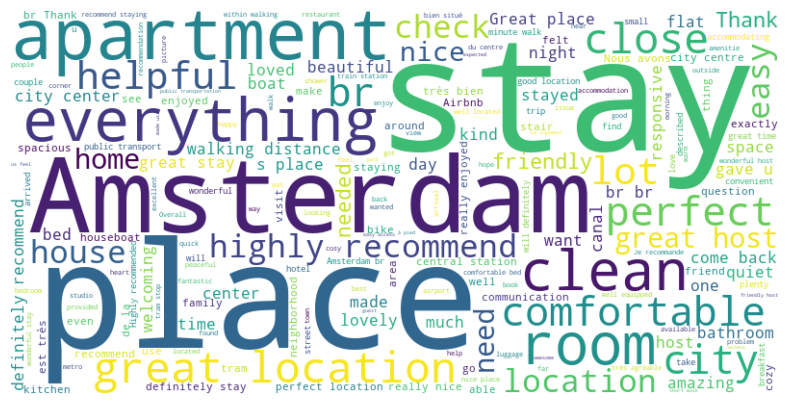

In [86]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

# Converting all the reviews to lower case

In [87]:
review_amsterdam_df['comments'] = review_amsterdam_df['comments'].apply(lambda x: str(x).lower())
print(review_amsterdam_df['comments'].head())

0    daniel is really cool. the place was nice and ...
1    daniel is the most amazing host! his place is ...
2    we had such a great time in amsterdam. daniel ...
3    very professional operation. room is very clea...
4    daniel is highly recommended.  he provided all...
Name: comments, dtype: object


# Removing all the special characters from the reviews

In [88]:
import re

review_amsterdam_df['comments'] = review_amsterdam_df['comments'].apply(lambda x: re.sub(r'[!@#$%^&*()_+=\-~`;:\'",.<>/?|\\]', '', x))
print(review_amsterdam_df['comments'].head())

0    daniel is really cool the place was nice and c...
1    daniel is the most amazing host his place is e...
2    we had such a great time in amsterdam daniel i...
3    very professional operation room is very clean...
4    daniel is highly recommended  he provided all ...
Name: comments, dtype: object


# Removing the html tags from the review

In [89]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Apply the function to the 'comments' column
review_amsterdam_df['comments'] = review_amsterdam_df['comments'].apply(remove_html_tags)

print(review_amsterdam_df['comments'].head())

0    daniel is really cool the place was nice and c...
1    daniel is the most amazing host his place is e...
2    we had such a great time in amsterdam daniel i...
3    very professional operation room is very clean...
4    daniel is highly recommended  he provided all ...
Name: comments, dtype: object


# Standardizing the reviews

In [90]:
review_amsterdam_df['comments'] = review_amsterdam_df['comments'].apply(lambda x: re.sub(r'(\d{1,2})/(\d{1,2})/(\d{4})', r'\2-\1-\3', x))
review_amsterdam_df['comments'].head()

0    daniel is really cool the place was nice and c...
1    daniel is the most amazing host his place is e...
2    we had such a great time in amsterdam daniel i...
3    very professional operation room is very clean...
4    daniel is highly recommended  he provided all ...
Name: comments, dtype: object

# Removing numerical data from the reviews

In [91]:
review_amsterdam_df['comments'] = review_amsterdam_df['comments'].str.replace('\d+', '', regex=True)
review_amsterdam_df['comments'].head()

0    daniel is really cool the place was nice and c...
1    daniel is the most amazing host his place is e...
2    we had such a great time in amsterdam daniel i...
3    very professional operation room is very clean...
4    daniel is highly recommended  he provided all ...
Name: comments, dtype: object

# Storing the listing and review data frame into a .csv file

In [92]:
import pandas as pd

# Saving DataFrame to CSV file
listing_amsterdam_price_df.to_csv('/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_listing_price_amsterdam.csv', index=False)  # index=False prevents saving the index as a column
listing_amsterdam_df.to_csv('/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_listing_amsterdam.csv', index=False)
listing_amsterdam_review_score_df.to_csv('/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_listing__review_score_amsterdam.csv', index=False)
review_amsterdam_df.to_csv('/Users/aishwaryaravichandran/Documents copy/machine learning neu/assignment_one/dataset/pre_processed_listing_dataset/processed_review_amsterdam.csv', index=False)  # index=False prevents saving the index as a column


